In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
computer_hardware = fetch_ucirepo(id=29) 
  
# data (as pandas dataframes) 
df = computer_hardware.data.features 
y = computer_hardware.data.targets 
  
# metadata 
print(computer_hardware.metadata) 
  
# variable information 
print(computer_hardware.variables) 

{'uci_id': 29, 'name': 'Computer Hardware', 'repository_url': 'https://archive.ics.uci.edu/dataset/29/computer+hardware', 'data_url': 'https://archive.ics.uci.edu/static/public/29/data.csv', 'abstract': 'Relative CPU Performance Data, described in terms of its cycle time, memory size, etc.', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 209, 'num_features': 10, 'feature_types': ['Integer'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1987, 'last_updated': 'Fri Oct 27 2023', 'dataset_doi': '10.24432/C5830D', 'creators': ['Jacob Feldmesser'], 'intro_paper': None, 'additional_info': {'summary': 'The estimated relative performance values were estimated by the authors using a linear regression method.  See their article (pp 308-313) for more details on how the relative performance values were set.', 'purpose': None, 'funded_by': N

In [16]:
df

,VendorName,ModelName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VendorName  209 non-null    object
 1   ModelName   209 non-null    object
 2   MYCT        209 non-null    int64 
 3   MMIN        209 non-null    int64 
 4   MMAX        209 non-null    int64 
 5   CACH        209 non-null    int64 
 6   CHMIN       209 non-null    int64 
 7   CHMAX       209 non-null    int64 
 8   PRP         209 non-null    int64 
 9   ERP         209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [18]:
categorical = [col for col in df.columns if df[col].dtype == 'O']
print("There are {} categorical variables " .format(len(categorical)))

There are 2 categorical variables 


In [19]:
print(categorical)

['VendorName', 'ModelName']


In [20]:
df[categorical].head()

,VendorName,ModelName
0,adviser,32/60
1,amdahl,470v/7
2,amdahl,470v/7a
3,amdahl,470v/7b
4,amdahl,470v/7c


In [21]:
#Exploring the categories in vendor name columns . 
df["VendorName"].value_counts()

VendorName
ibm             32
nas             19
ncr             13
sperry          13
honeywell       13
siemens         12
cdc              9
amdahl           9
burroughs        8
hp               7
harris           7
dg               7
dec              6
c.r.d            6
ipl              6
magnuson         6
cambex           5
prime            5
formation        5
perkin-elmer     3
gould            3
nixdorf          3
wang             2
bti              2
basf             2
apollo           2
microdata        1
four-phase       1
sratus           1
adviser          1
Name: count, dtype: int64

In [23]:
print("Number of unique model names " , len(df["ModelName"].unique()))

Number of unique model names  209


array(['32/60', '470v/7', '470v/7a', '470v/7b', '470v/7c', '470v/b',
       '580-5840', '580-5850', '580-5860', '580-5880', 'dn320', 'dn420',
       '7/65', '7/68', '5000', '8000', 'b1955', 'b2900', 'b2925', 'b4955',
       'b5900', 'b5920', 'b6900', 'b6925', '68/10-80', 'universe:2203t',
       'universe:68', 'universe:68/05', 'universe:68/137',
       'universe:68/37', 'cyber:170/750', 'cyber:170/760',
       'cyber:170/815', 'cyber:170/825', 'cyber:170/835', 'cyber:170/845',
       'omega:480-i', 'omega:480-ii', 'omega:480-iii', '1636-1',
       '1636-10', '1641-1', '1641-11', '1651-1', 'decsys:10:1091',
       'decsys:20:2060', 'microvax-1', 'vax:11/730', 'vax:11/750',
       'vax:11/780', 'eclipse:c/350', 'eclipse:m/600', 'eclipse:mv/10000',
       'eclipse:mv/4000', 'eclipse:mv/6000', 'eclipse:mv/8000',
       'eclipse:mv/8000-ii', 'f4000/100', 'f4000/200', 'f4000/200ap',
       'f4000/300', 'f4000/300ap', '2000/260', 'concept:32/8705',
       'concept:32/8750', 'concept:32/8780'

In [25]:
numerical = [col for col in df.columns if df[col].dtype != 'O']
print("There are {} numerical variables " .format(len(numerical)))

There are 8 numerical variables 


In [26]:
print(numerical)

['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']


In [27]:
df[numerical].head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,125,256,6000,256,16,128,198,199
1,29,8000,32000,32,8,32,269,253
2,29,8000,32000,32,8,32,220,253
3,29,8000,32000,32,8,32,172,253
4,29,8000,16000,32,8,16,132,132


In [28]:
# there are 2 categorical and 8 numerical variable in the dataset.
# the 2 categorical variable vendor name and model name which is n

SyntaxError: invalid syntax (219515710.py, line 1)

In [36]:
# Estimate correlation coefficients 
pd.options.display.float_format = "{: ,.4f}".format
corr_matrix = df.corr()
corr_matrix

ValueError: could not convert string to float: 'adviser'

In [37]:
df

,VendorName,ModelName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [39]:
numeric_df = df.select_dtypes(include = ['number'])
corr_matrix = numeric_df.corr()
print(corr_matrix)

         MYCT    MMIN    MMAX    CACH   CHMIN   CHMAX     PRP     ERP
MYCT   1.0000 -0.3356 -0.3786 -0.3210 -0.3011 -0.2505 -0.3071 -0.2884
MMIN  -0.3356  1.0000  0.7582  0.5347  0.5172  0.2669  0.7949  0.8193
MMAX  -0.3786  0.7582  1.0000  0.5380  0.5605  0.5272  0.8630  0.9012
CACH  -0.3210  0.5347  0.5380  1.0000  0.5822  0.4878  0.6626  0.6486
CHMIN -0.3011  0.5172  0.5605  0.5822  1.0000  0.5483  0.6089  0.6106
CHMAX -0.2505  0.2669  0.5272  0.4878  0.5483  1.0000  0.6052  0.5922
PRP   -0.3071  0.7949  0.8630  0.6626  0.6089  0.6052  1.0000  0.9665
ERP   -0.2884  0.8193  0.9012  0.6486  0.6106  0.5922  0.9665  1.0000


In [40]:
corr_matrix["ERP"].sort_values(ascending = False)

ERP      1.0000
PRP      0.9665
MMAX     0.9012
MMIN     0.8193
CACH     0.6486
CHMIN    0.6106
CHMAX    0.5922
MYCT    -0.2884
Name: ERP, dtype: float64

In [ ]:
# Interpretation of correlation coefficient
# The correlation coefficient ranges from -1 to +1.

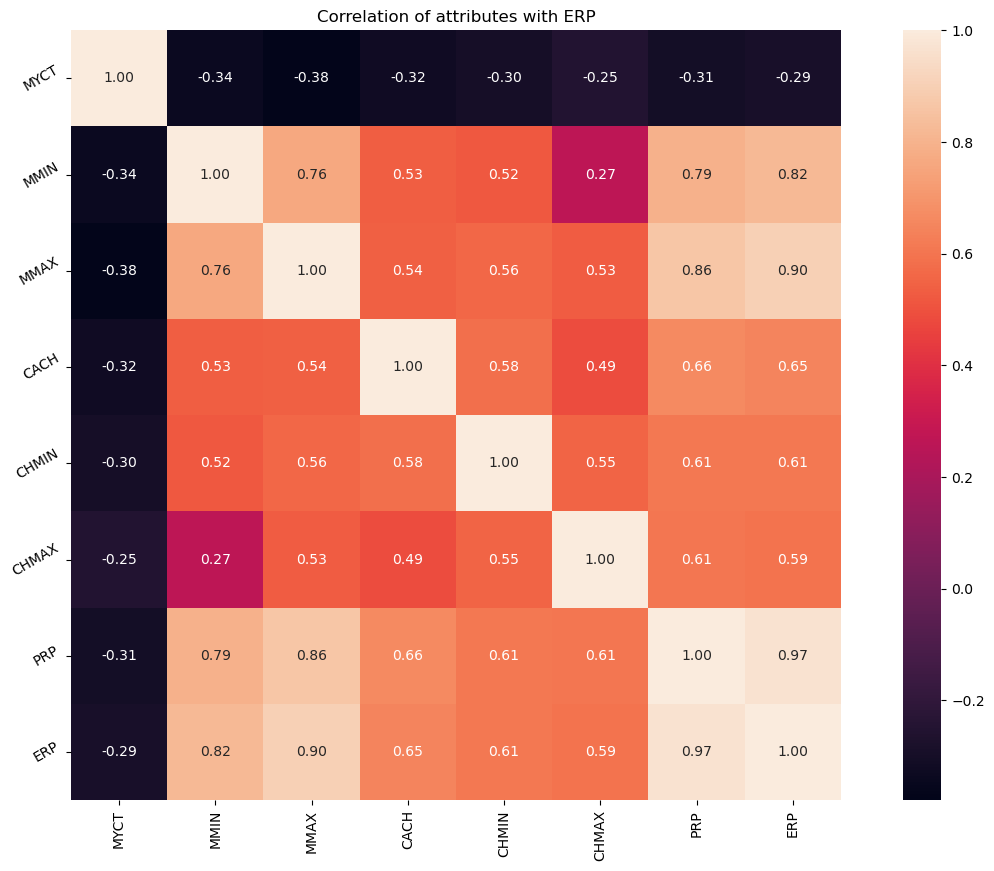

In [44]:
# Correlation heat map
plt.figure(figsize = (16,10))
plt.title("Correlation of attributes with ERP")
a = sns.heatmap(corr_matrix , square = True , annot = True , fmt = ".2f" , linecolor = "white")
a.set_xticklabels(a.get_xticklabels() , rotation = 90)
a.set_yticklabels(a.get_yticklabels() , rotation = 30)
plt.show()

In [45]:
df.isnull().sum()

VendorName    0
ModelName     0
MYCT          0
MMIN          0
MMAX          0
CACH          0
CHMIN         0
CHMAX         0
PRP           0
ERP           0
dtype: int64

In [46]:
df.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.0000,209.0000,209.0000,209.0000,209.0000,209.0000,209.0000,209.0000
mean,203.8230,"2,867.9809","11,796.1531",25.2057,4.6986,18.2679,105.6220,99.3301
std,260.2629,"3,878.7428","11,726.5644",40.6287,6.8163,25.9973,160.8307,154.7571
min,17.0000,64.0000,64.0000,0.0000,0.0000,0.0000,6.0000,15.0000
25%,50.0000,768.0000,"4,000.0000",0.0000,1.0000,5.0000,27.0000,28.0000
50%,110.0000,"2,000.0000","8,000.0000",8.0000,2.0000,8.0000,50.0000,45.0000
75%,225.0000,"4,000.0000","16,000.0000",32.0000,6.0000,24.0000,113.0000,101.0000
max,"1,500.0000","32,000.0000","64,000.0000",256.0000,52.0000,176.0000,"1,150.0000","1,238.0000"


In [48]:
#outliers detect
for var in ["MYCT" ,"MMIN" , "MMAX" , "CACH" , "CHMIN" , "CHMAX"]:
    print(df[var].value_counts() / float(len(df)))
    print()

MYCT
50      0.1196
140     0.0431
26      0.0383
300     0.0383
56      0.0335
320     0.0335
38      0.0335
180     0.0335
200     0.0287
75      0.0287
105     0.0287
800     0.0287
143     0.0239
160     0.0239
900     0.0239
110     0.0191
25      0.0191
29      0.0191
23      0.0191
60      0.0191
400     0.0191
115     0.0144
100     0.0144
225     0.0144
250     0.0144
92      0.0144
30      0.0144
125     0.0144
480     0.0144
330     0.0144
57      0.0096
1500    0.0096
59      0.0096
240     0.0096
133     0.0096
72      0.0096
810     0.0096
700     0.0096
40      0.0096
17      0.0096
1100    0.0096
84      0.0048
124     0.0048
116     0.0048
203     0.0048
70      0.0048
52      0.0048
175     0.0048
350     0.0048
167     0.0048
112     0.0048
185     0.0048
64      0.0048
48      0.0048
35      0.0048
600     0.0048
90      0.0048
220     0.0048
150     0.0048
98      0.0048
Name: count, dtype: float64

MMIN
2000     0.2584
1000     0.1818
512      0.1053
4000     0.10

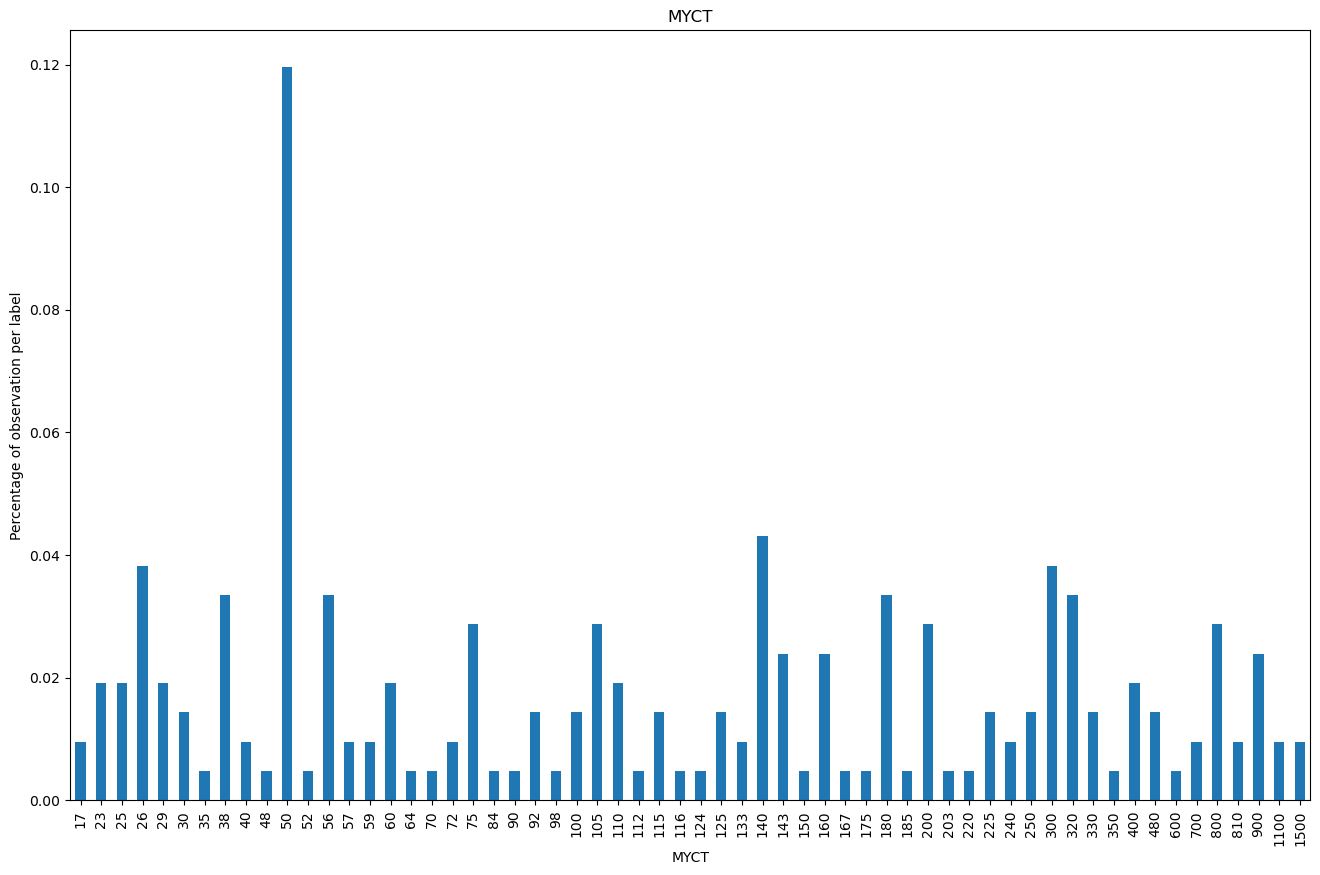

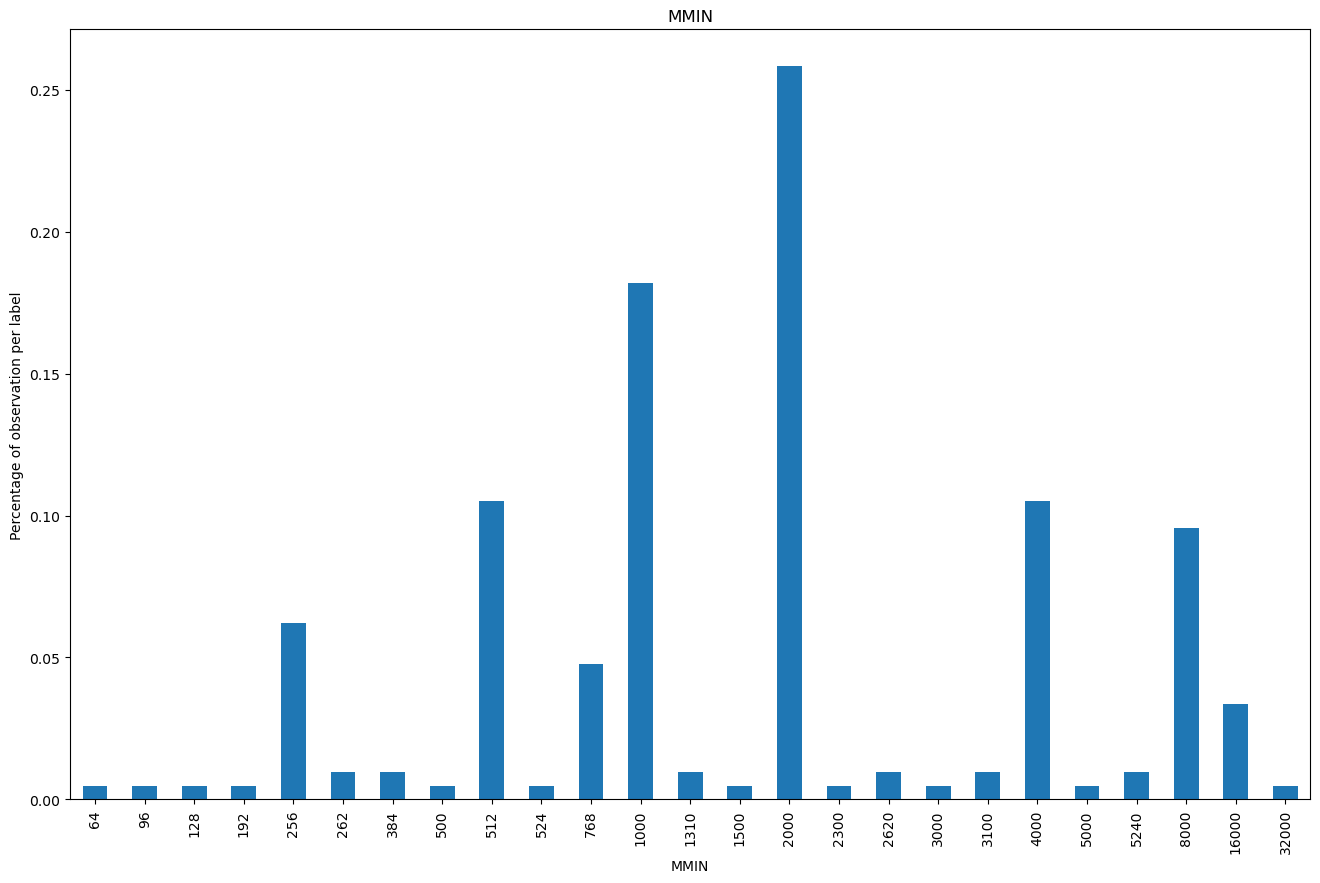

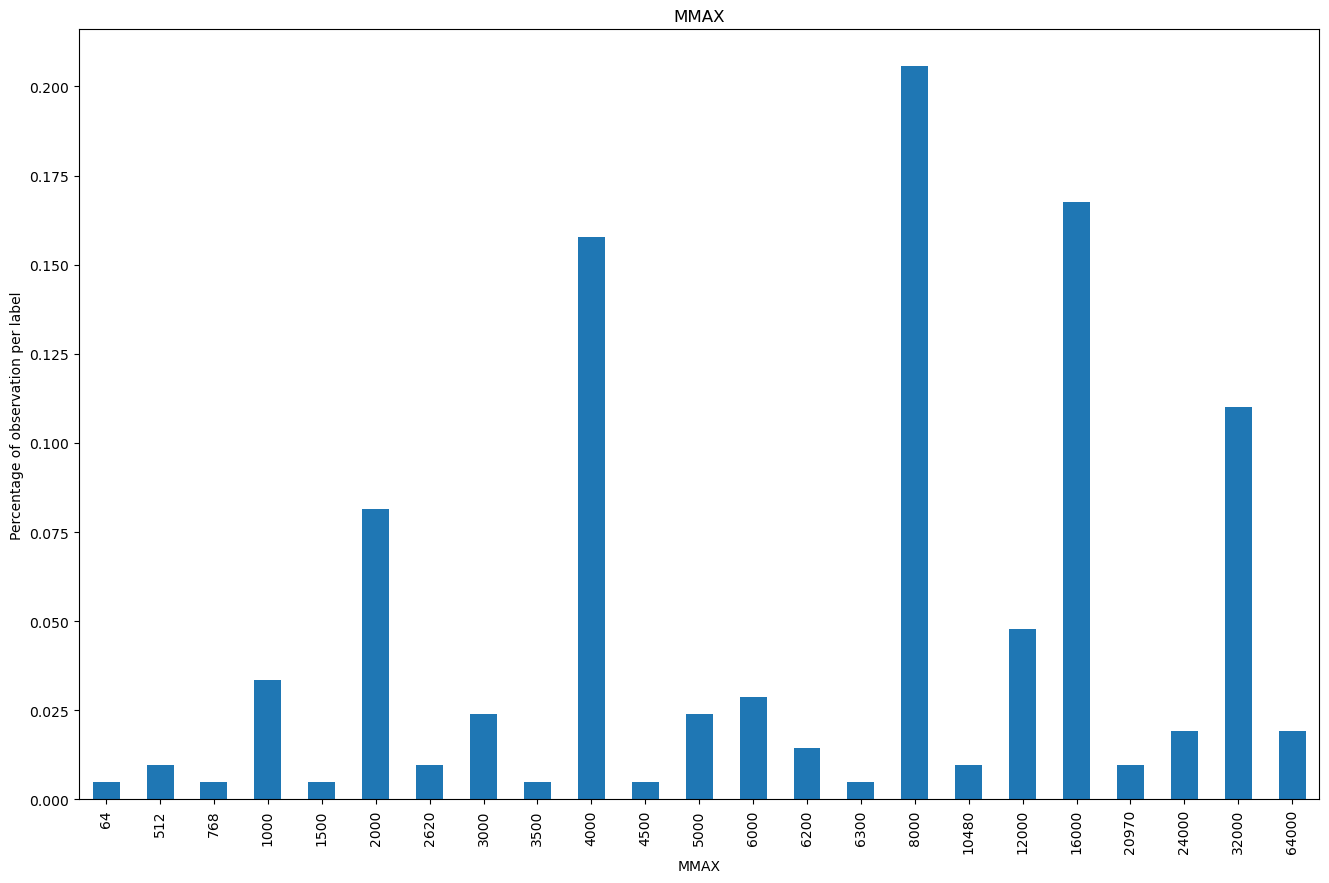

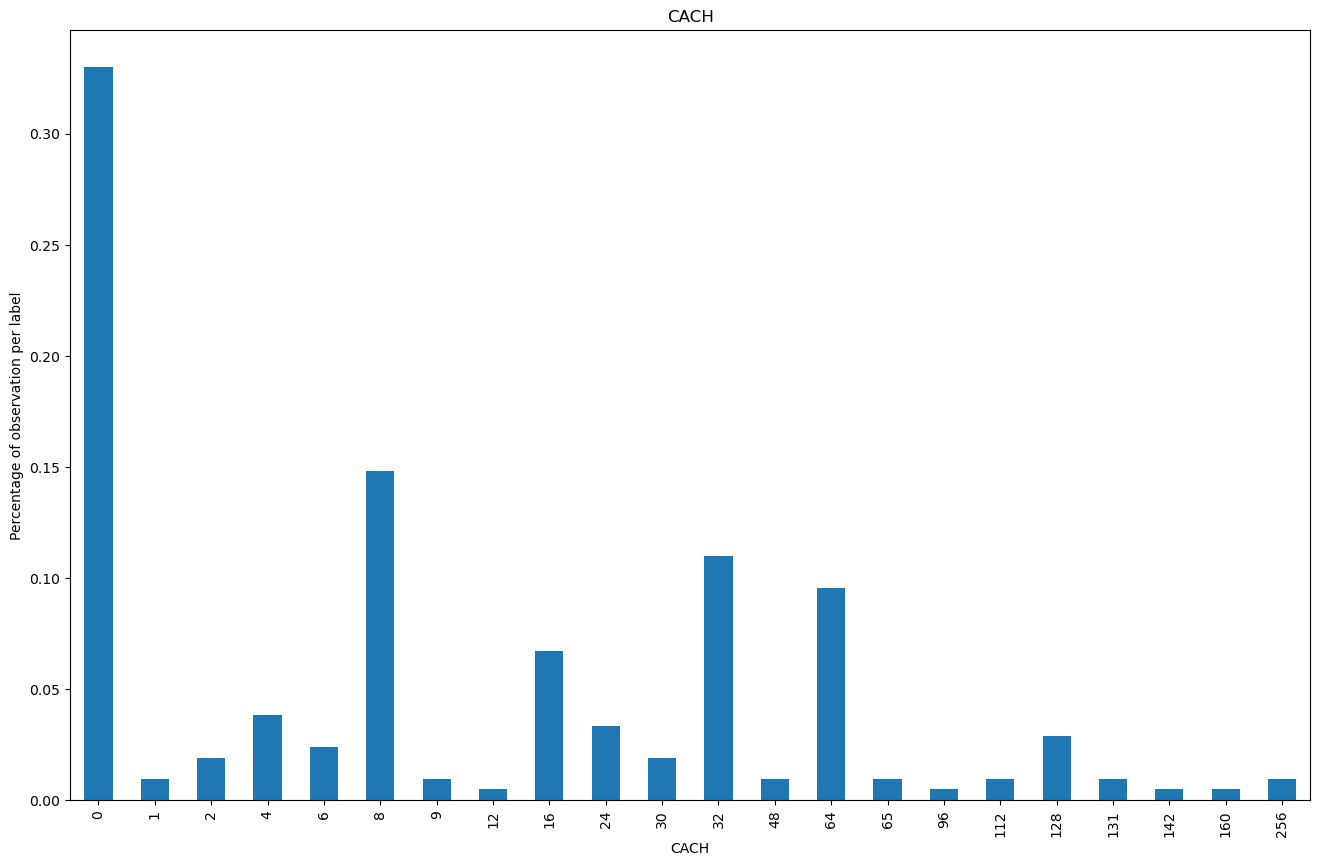

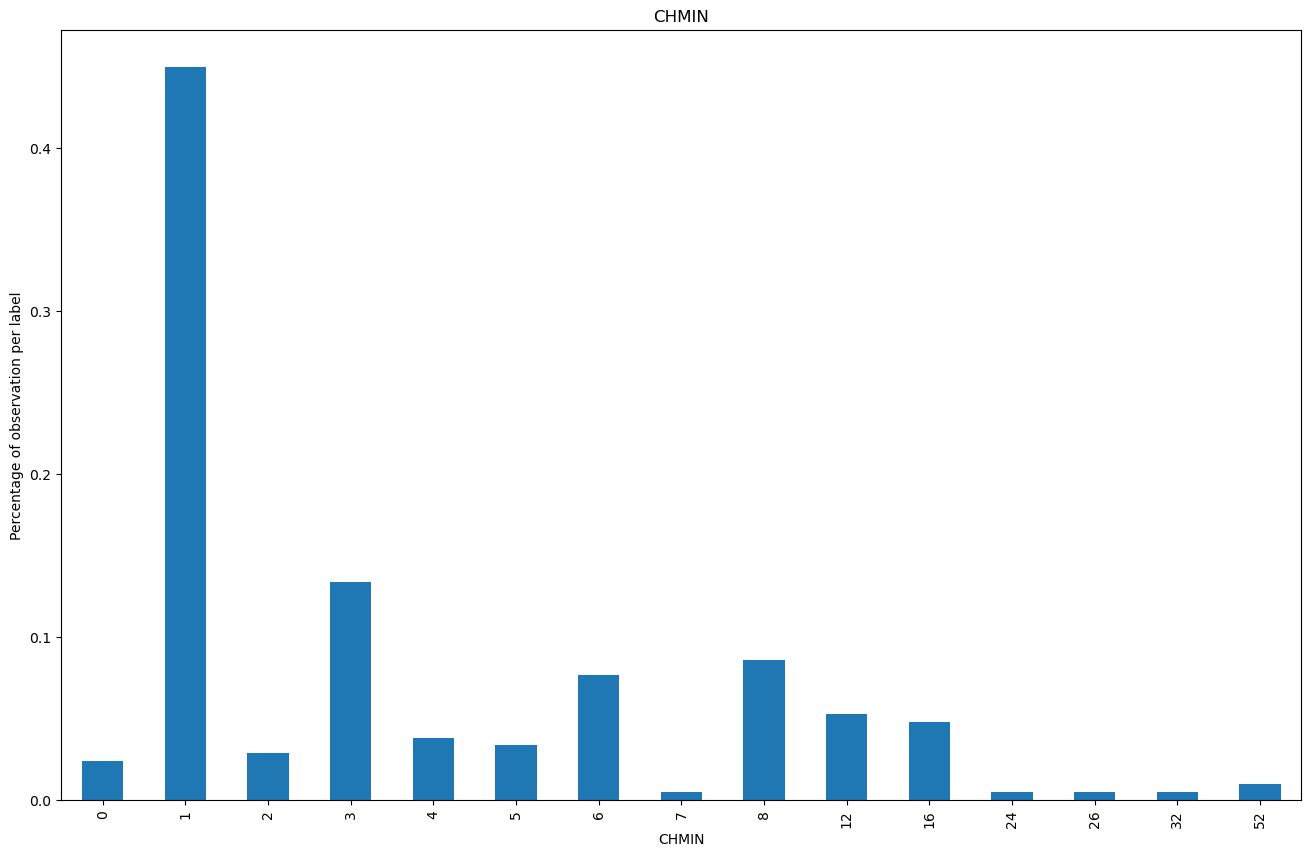

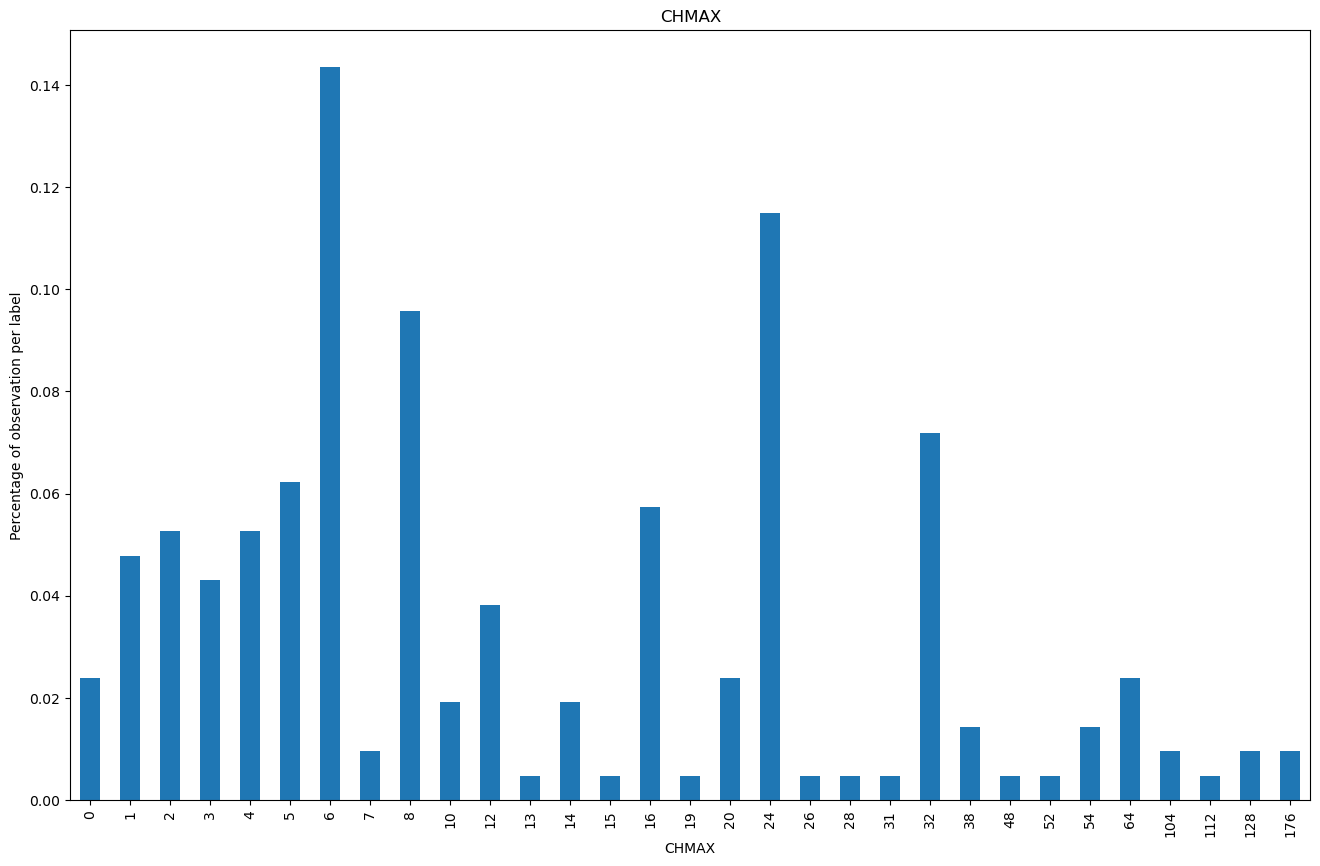

In [49]:
#Detect outlier in discrete variables.
for var in ["MYCT" ,"MMIN" , "MMAX" , "CACH" , "CHMIN" , "CHMAX"]:
    plt.figure(figsize = (16,10))
    (df.groupby(var)[var].count() / float(len(df))).plot.bar()
    plt.ylabel("Percentage of observation per label")
    plt.title(var)
    plt.show()

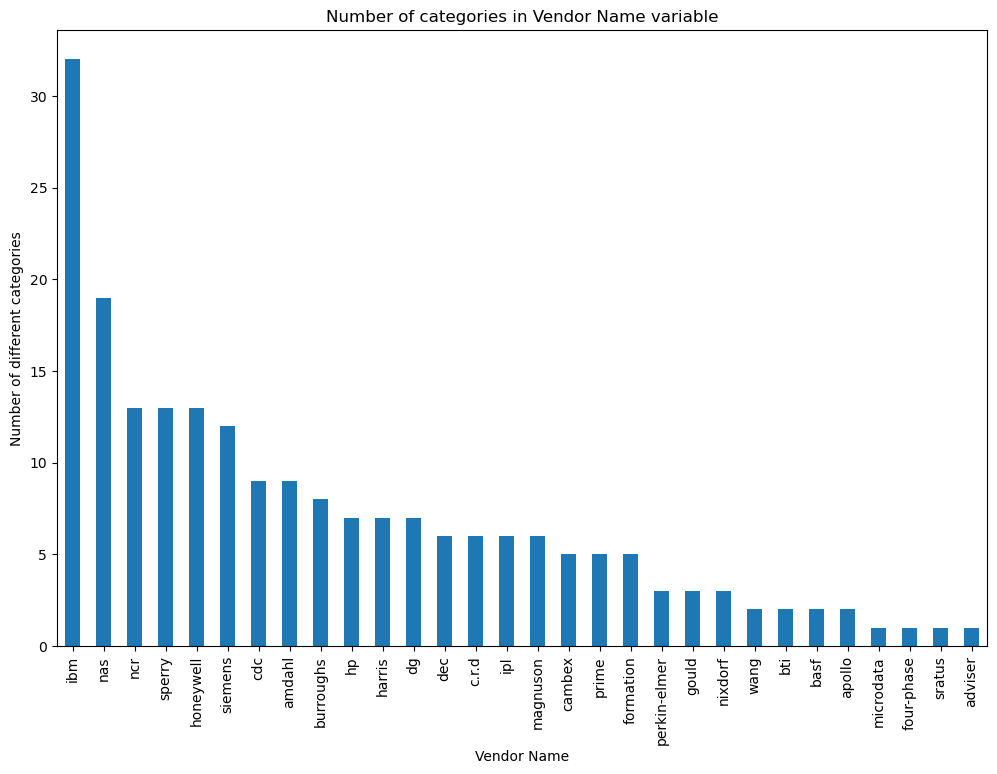

In [54]:
plt.figure(figsize=(12,8))
(df['VendorName'].value_counts()).plot.bar()
plt.title('Number of categories in Vendor Name variable')
plt.xlabel('Vendor Name')
plt.ylabel('Number of different categories')
plt.show()

In [55]:
# divide the dataset into categorical and numerical variables.
df_cat = df.iloc[:,:2]
df_num = df.iloc[:,2:]

In [56]:
df_num.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,125,256,6000,256,16,128,198,199
1,29,8000,32000,32,8,32,269,253
2,29,8000,32000,32,8,32,220,253
3,29,8000,32000,32,8,32,172,253
4,29,8000,16000,32,8,16,132,132


In [57]:
x  = df_num.iloc[:,0:6]
y = df_num.iloc[:,-1]

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.20 , random_state = 42)

In [62]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(167, 6)
(167,)
(42, 6)
(42,)


In [63]:
x_train.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
150,40,8000,16000,32,8,16
96,26,16000,32000,64,8,24
199,30,8000,64000,128,12,176
68,105,1000,4000,0,3,24
156,30,16000,32000,256,16,24


In [64]:
x_train.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
count,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000
mean,207.0000,"2,782.5509","11,459.7365",24.7006,4.2455,17.3054
std,268.0178,"3,373.2652","10,852.6596",41.5680,5.7660,23.4905
min,17.0000,64.0000,64.0000,0.0000,0.0000,0.0000
25%,50.0000,768.0000,"4,000.0000",0.0000,1.0000,5.0000
50%,112.0000,"2,000.0000","8,000.0000",8.0000,1.0000,8.0000
75%,225.0000,"3,550.0000","16,000.0000",32.0000,6.0000,24.0000
max,"1,500.0000","16,000.0000","64,000.0000",256.0000,52.0000,176.0000


# Feature Scaliing

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler =  StandardScaler()
x_train =  scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [67]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train , y_train)

LinearRegression()

# 12. Predicting the results
# I have built the linear regression model. Now it is time to predict the results.a

y_test

In [70]:
y_pred = lr.predict(x_test)

In [72]:
lr.predict(x_test)[0:5]

array([ 79.68297665,  -2.88519744,   5.65963718, 679.72932483,
        49.83687839])

In [74]:
print("Number of coefficients:", len(lr.coef_))

Number of coefficients: 6


In [76]:
print("Estimated coefficients: {}".format(lr.coef_))
print("Estimated intercept: {}".format(lr.intercept_))

Estimated coefficients: [14.0640412  29.98749013 75.13675581 25.68993211 -0.23418754 20.89231002]
Estimated intercept: 92.22754491017965


In [80]:
dataset = list(zip(pd.DataFrame(x_train).columns, lr.coef_))
pd.DataFrame(data = dataset, columns = ['Features', 'Estimated Coefficients']).set_index('Features')

,Estimated Coefficients
Features,
0,14.0640
1,29.9875
2,75.1368
3,25.6899
4,-0.2342
5,20.8923


In [81]:
# rmse
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value : {:.2f}".format(rmse))

RMSE value : 80.58


In [82]:
# r2score

from sklearn.metrics import r2_score
print("R2 Score value: {:.2f}".format(r2_score(y_test, y_pred)))

R2 Score value: 0.88


In [86]:
print("Training set score: {:.2f}".format(lr.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(x_test, y_test)))

Training set score: 0.91
Test set score: 0.88


In [87]:
# import the library
from sklearn.model_selection import cross_val_score

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(lr, x, y, cv=5)


In [88]:
print(cv_scores.round(4))

[ 0.8484 -0.864   0.7149  0.8755  0.7707]


In [89]:
# print the avarage 5-fold cross-validation scores
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores).round(4)))

Average 5-Fold CV Score: 0.4691


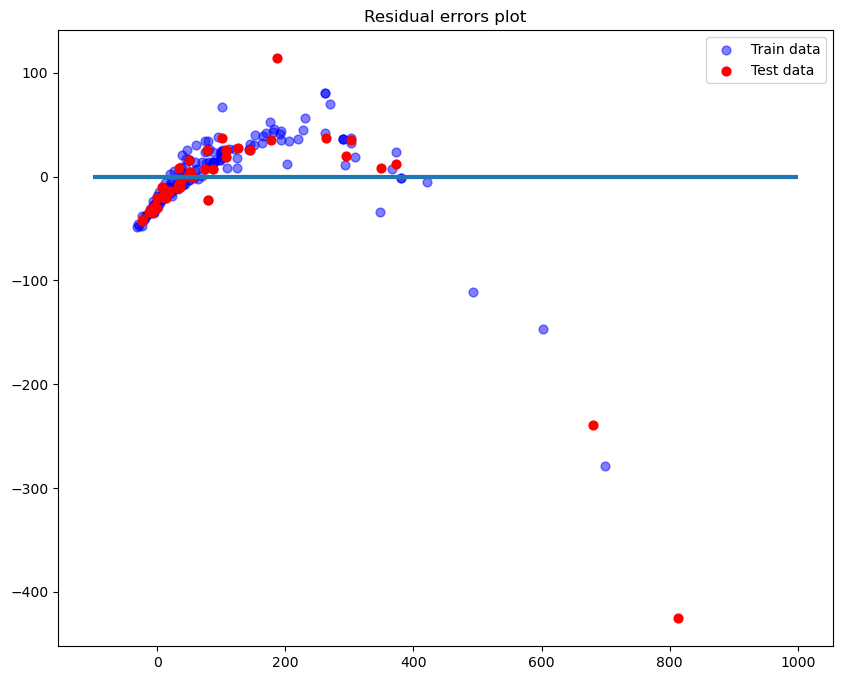

In [90]:
# Plot for residual error

# adjust the figure size
plt.figure(figsize=(10,8))

# plotting residual errors in training data
plt.scatter(lr.predict(x_train), lr.predict(x_train) - y_train, c = 'b', s = 40, label = 'Train data', alpha = 0.5)

# plotting residual errors in test data
plt.scatter(lr.predict(x_test), lr.predict(x_test) - y_test, c = 'r', s = 40, label = 'Test data')

# plotting line for zero residual error
plt.hlines(y = 0, xmin = -100, xmax = 1000, linewidth = 3)

# plotting legend
plt.legend(loc = 'upper right')

# plot title
plt.title("Residual errors plot")

# function to show plot
plt.show()

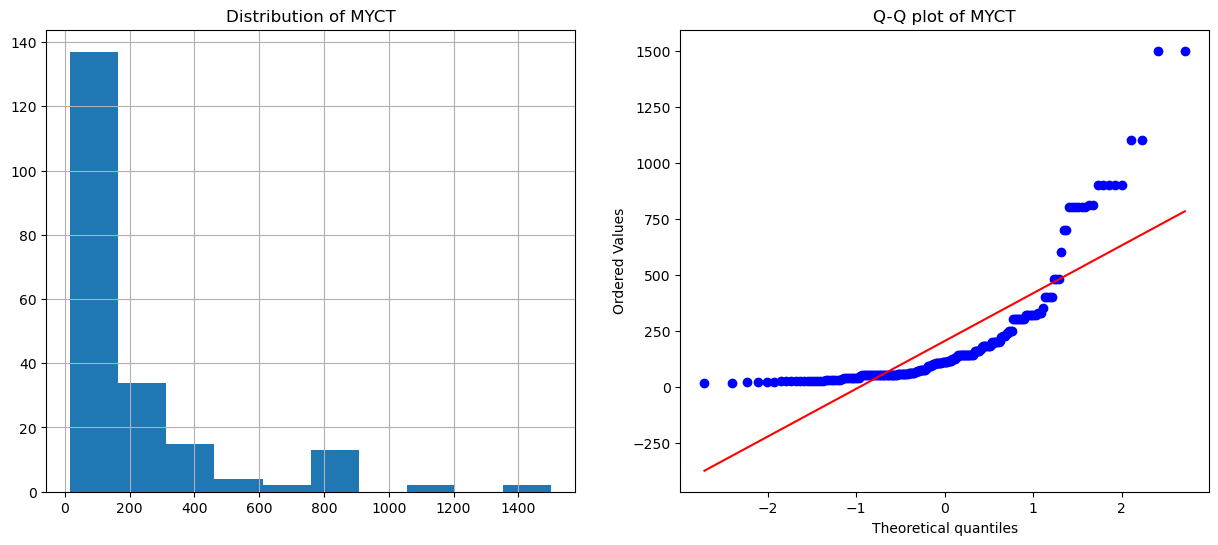

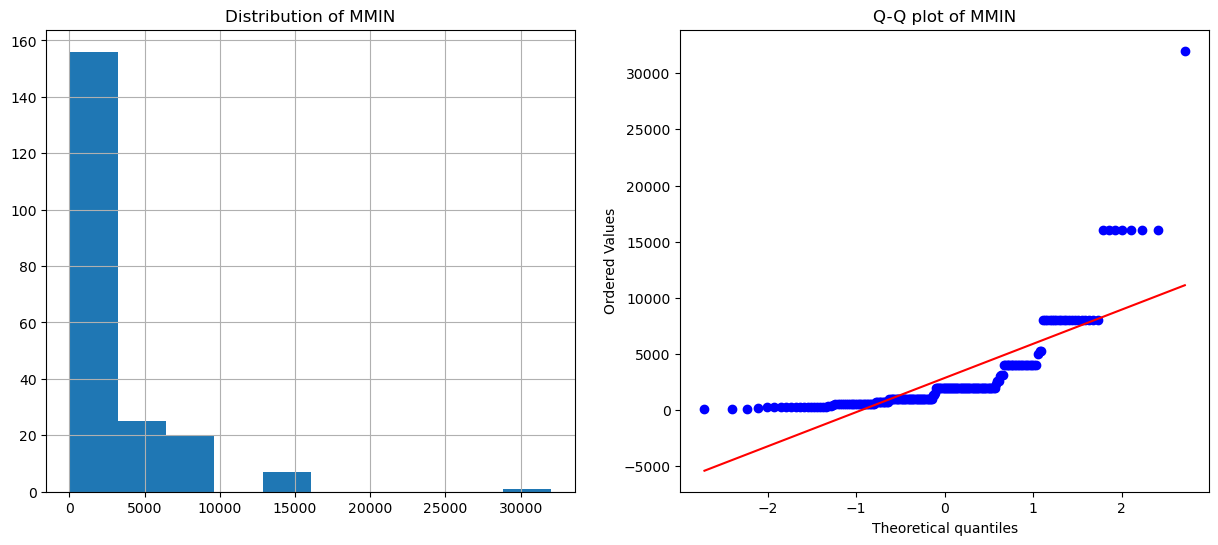

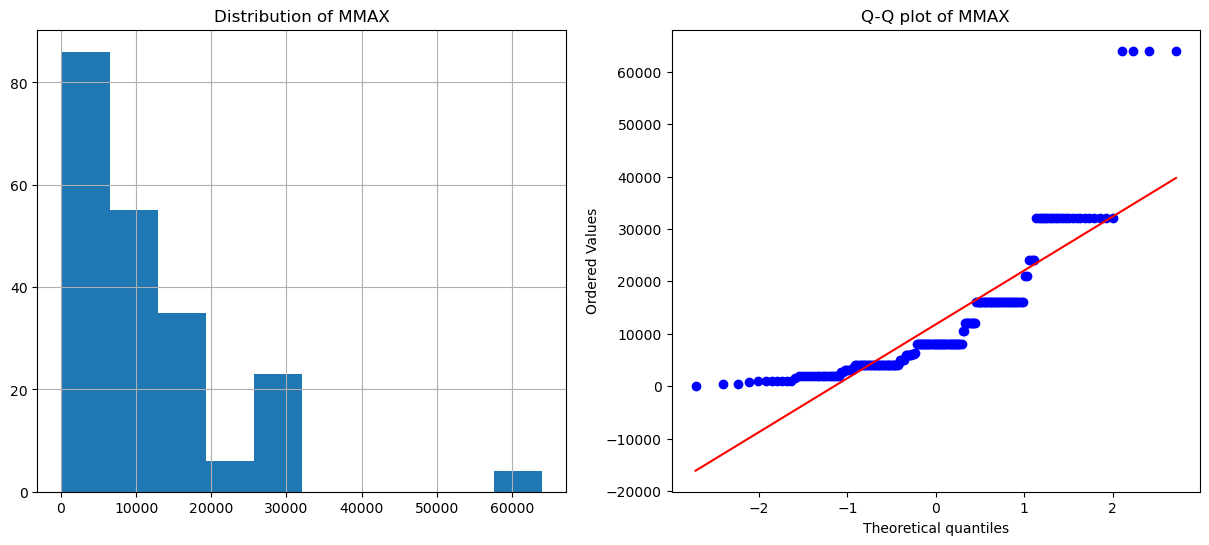

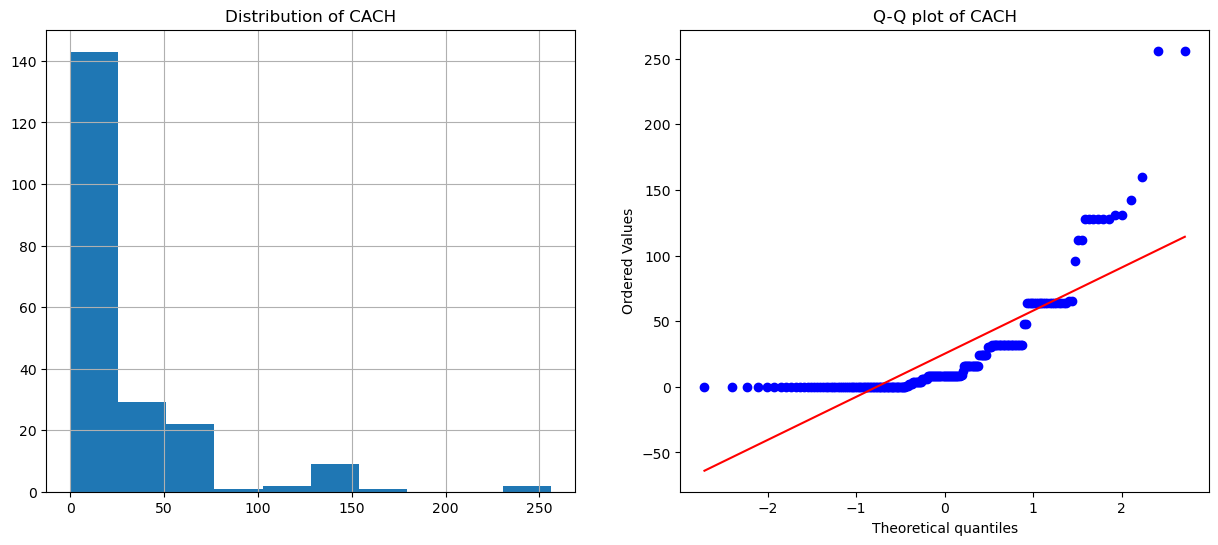

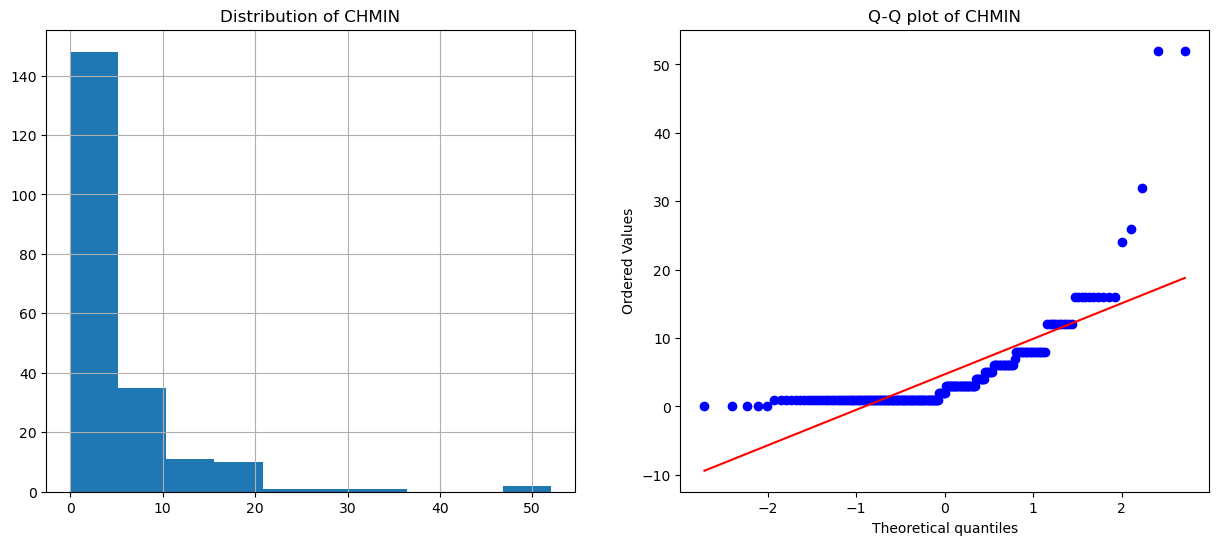

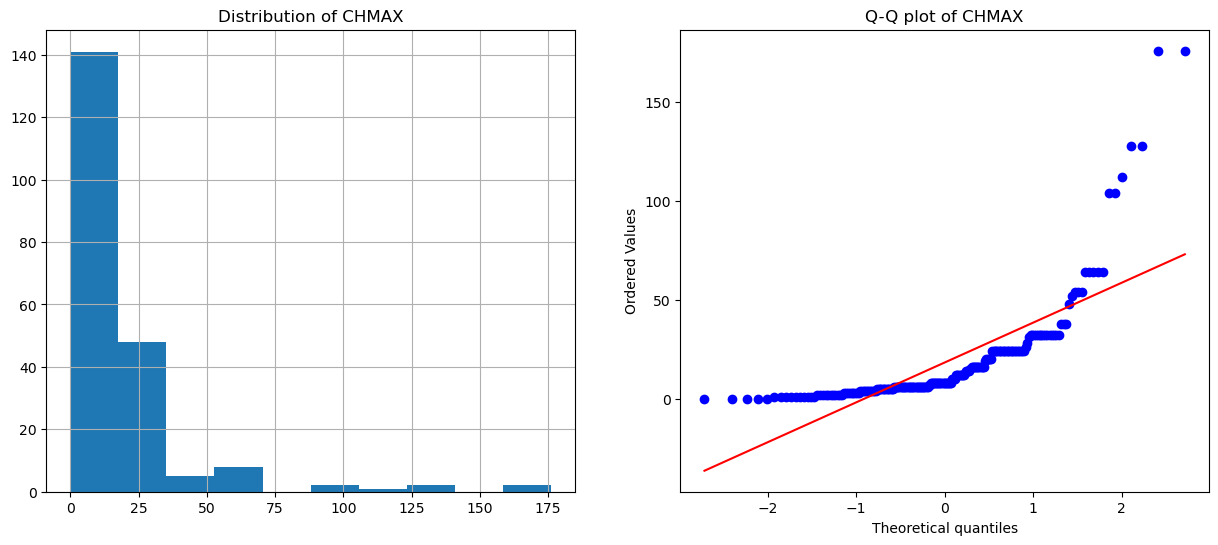

In [91]:
# plotting the Q-Q plot

import pylab 
import scipy.stats as stats


for var in ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']:
    
    plt.figure(figsize=(15,6))

    plt.subplot(1, 2, 1)
    df[var].hist()
    plt.title('Distribution of '+ var)

    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=pylab)
    plt.title('Q-Q plot of '+ var)

    plt.show() 